# 目的

商品毎に売上が日付に左右されているのかを検証

## Import & GloalVariables

In [1]:
% matplotlib inline

import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import bokeh.plotting as bplt
from IPython.display import display, HTML
from pprintpp import pprint as pp
import xgboost as xgb
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV

bplt.output_notebook()

/Users/kei/penv2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading BokehJS ...

In [2]:
datanames  = ['product', 'sales', 'store', 'test', 'train']
sex = ['m', 'w']
age = ['00_19', '20_49', '50_']
segments = ['m00_19', 'm20_49', 'm50_', 'w00_19', 'w20_49', 'w50_']
pids = ['p000', 'p001', 'p002', 'p003', 'p004', 'p005', 'p006', 'p007',
       'p008', 'p009', 'p010', 'p011', 'p012', 'p013', 'p014', 'p015',
       'p016', 'p017', 'p018', 'p019', 'p020', 'p021', 'p022', 'p023',
       'p024', 'p025', 'p026', 'p027', 'p028', 'p029', 'p030', 'p031',
       'p032', 'p033', 'p034', 'p035', 'p036', 'p037', 'p038', 'p039',
       'p040', 'p041', 'p042', 'p043', 'p044', 'p045', 'p046', 'p047',
       'p048', 'p049', 'p050', 'p051', 'p052', 'p053', 'p054', 'p055',
       'p056', 'p057', 'p058', 'p059', 'p060', 'p061', 'p062', 'p063',
       'p064', 'p065', 'p066', 'p067', 'p068', 'p069', 'p070', 'p071',
       'p072']
train_dates = [201506, 201507, 201508, 201509, 201510, 201511, 201512, 201601, 201602, 201603, 201604, 201605]
store_catecol = ['area', 'location']
size_dict = {'size_g': 'g', 'size_stick':'本', 'size_piece':'個', 'size_sheet':'枚'}
# 本 -> stick for index[50] , 個 -> stick for index[14, 15, 25, 37] , 枚 -> stick for index[27, 28] 
product_catecol = ['category', 'package_type', 'genre', 'manufacturer']
product_apeals = ['cal', '食物繊維', '乳酸菌', 'オリーブオイル', '砂糖', '糖類', '糖質', '食塩']
allergys= ['allergy_egg', 'allergy_wheat', 'allergy_milk', 'allergy_peanut', 'allergy_shrimp']

In [3]:
df_dict_origin = {datanames[n] : pd.read_csv('../data/{}.tsv'.format(name), delimiter='\t') for n, name in enumerate(datanames)}
df_dict = {name : df_dict_origin[name].copy() for name in df_dict_origin}

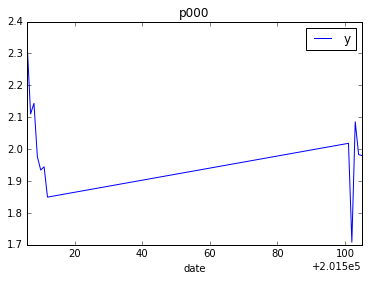

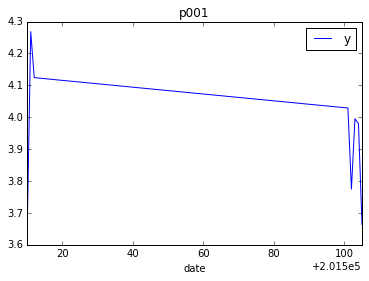

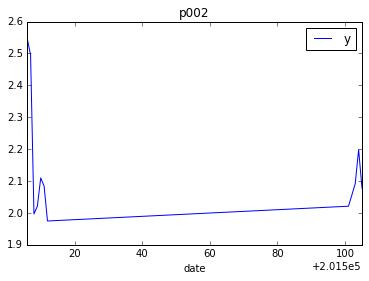

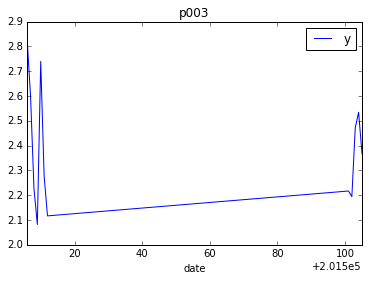

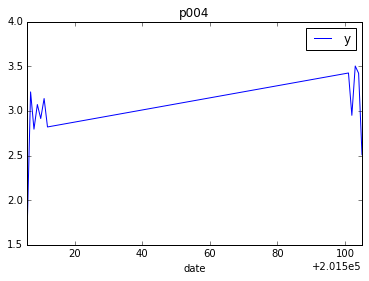

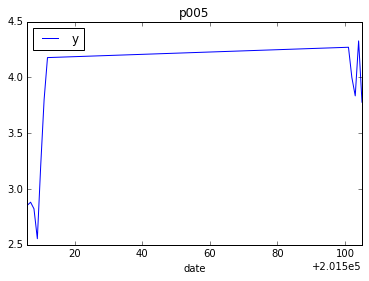

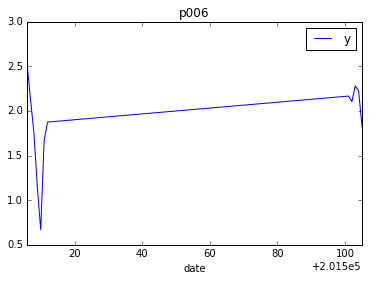

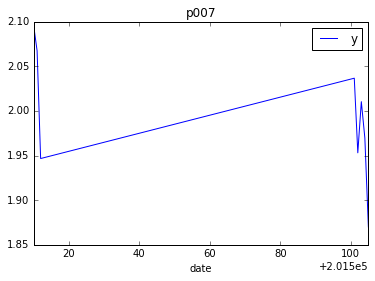

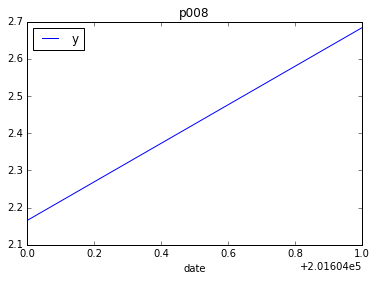

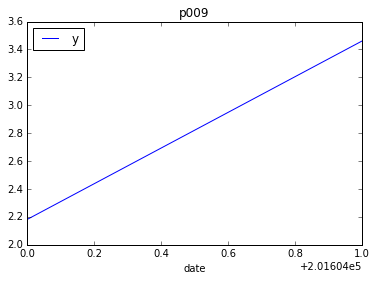

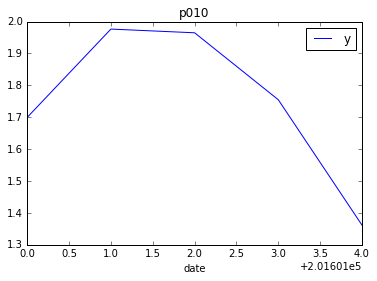

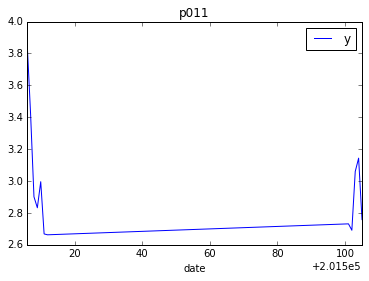

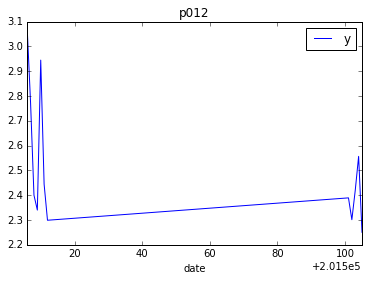

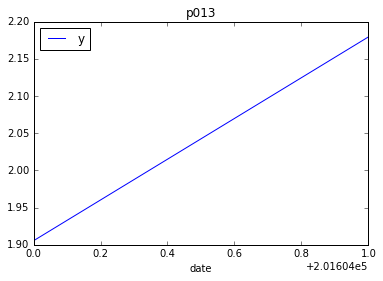

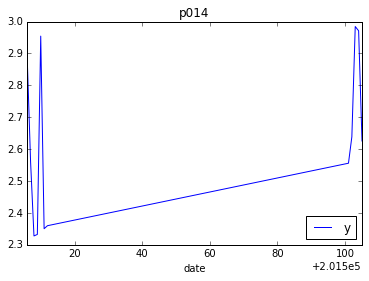

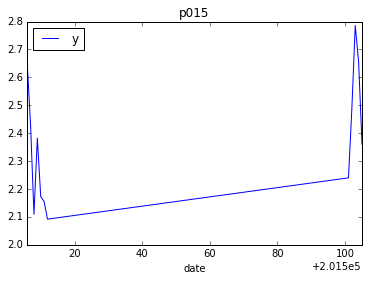

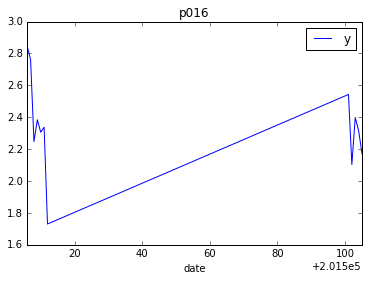

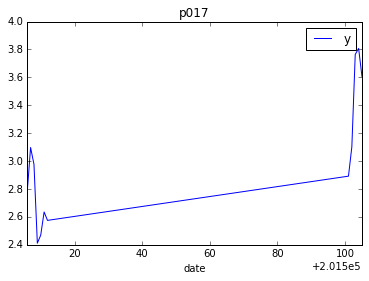

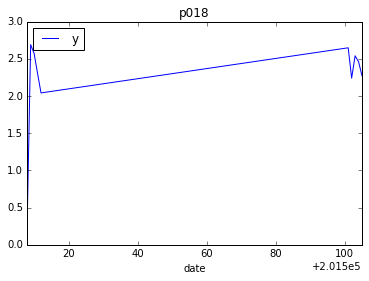

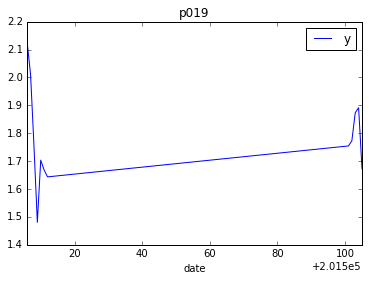

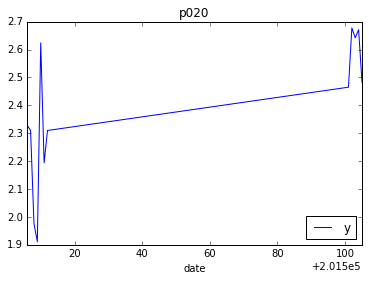

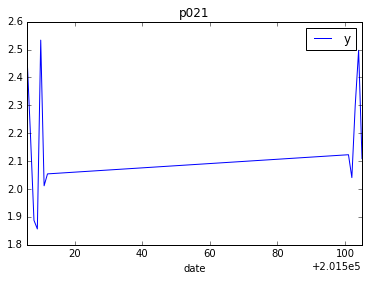

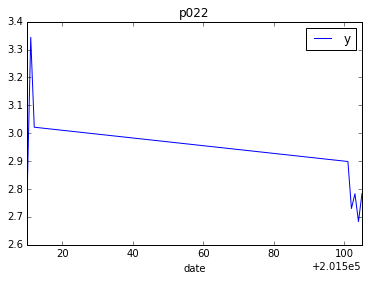

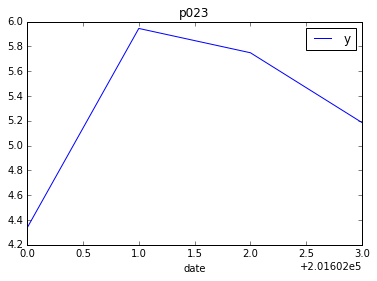

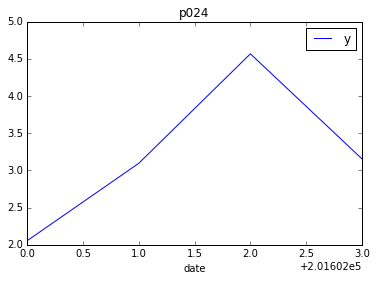

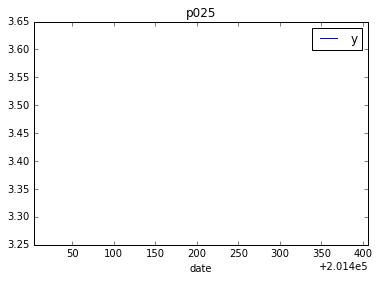

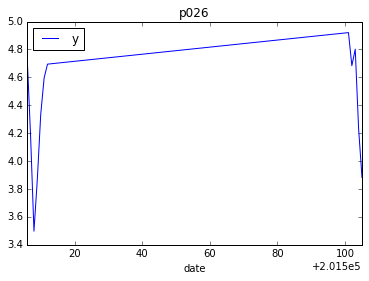

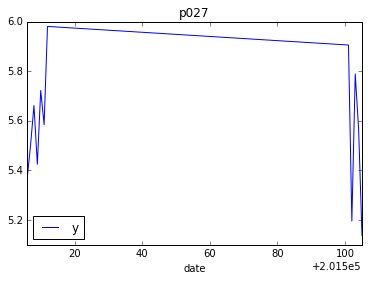

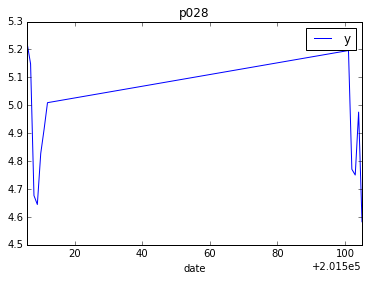

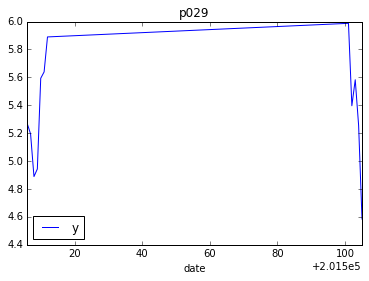

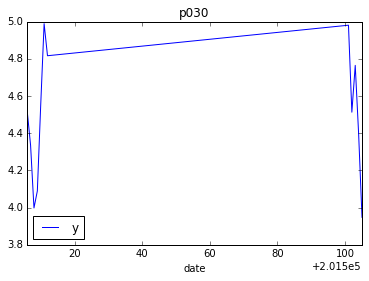

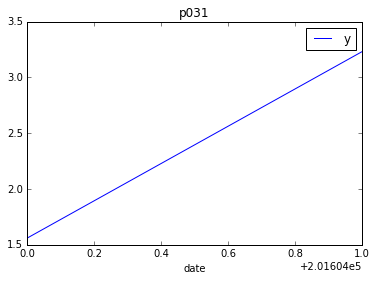

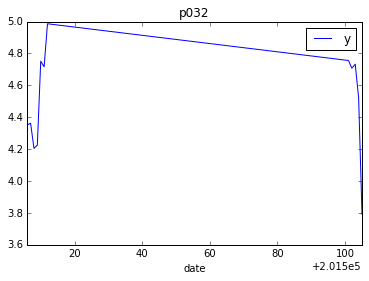

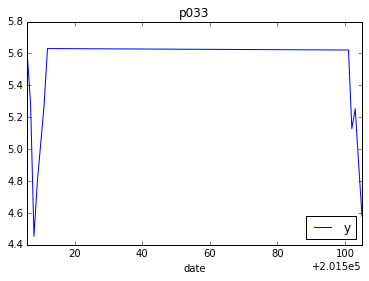

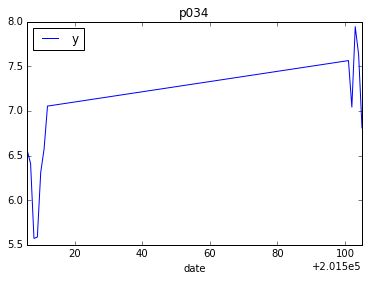

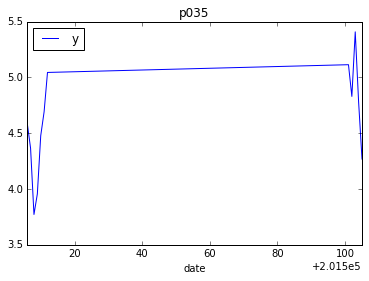

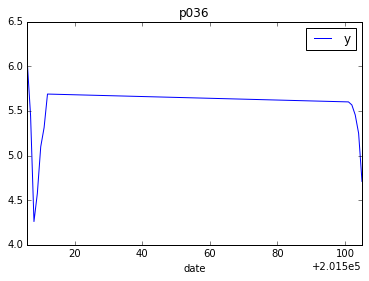

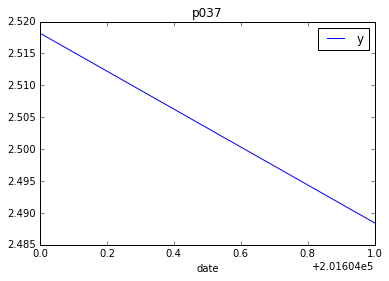

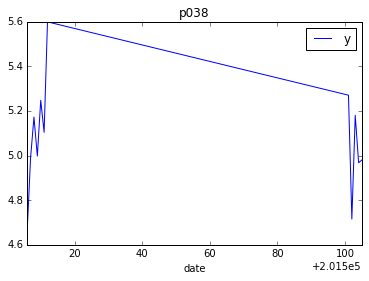

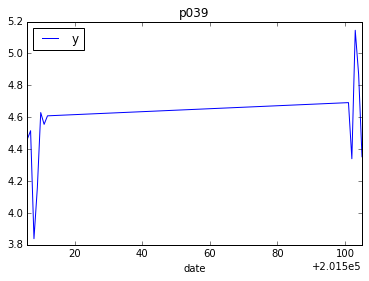

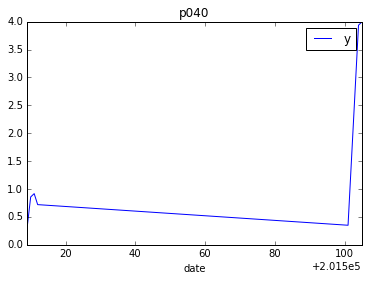

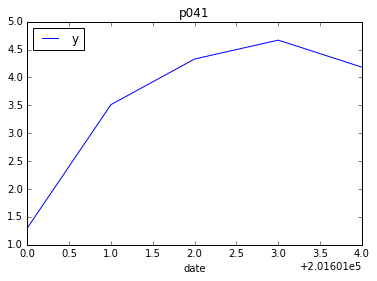

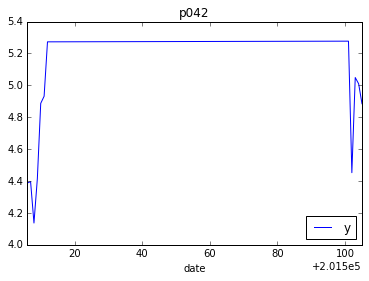

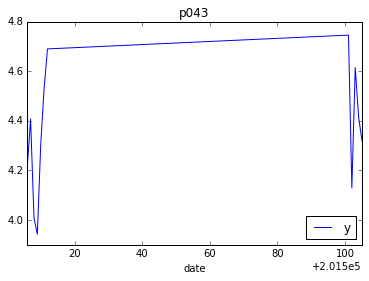

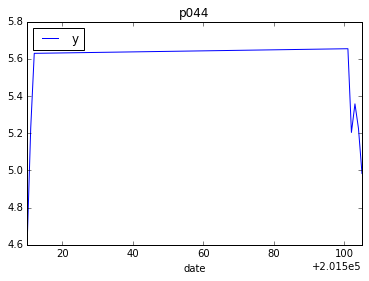

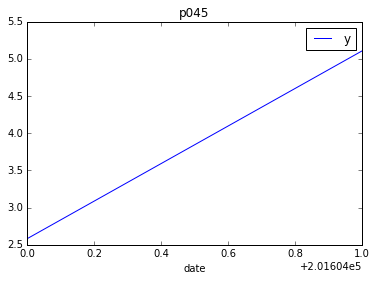

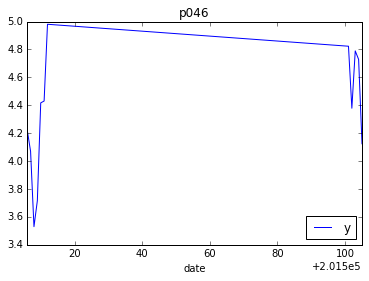

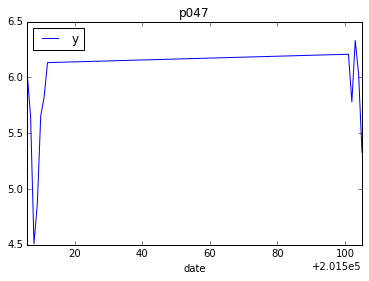

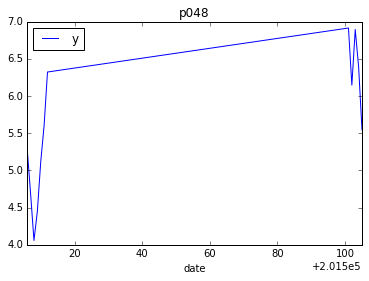

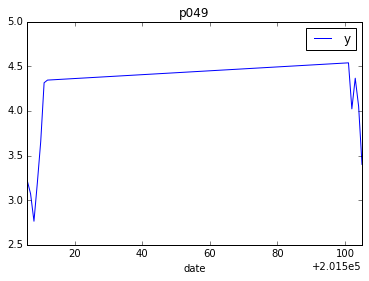

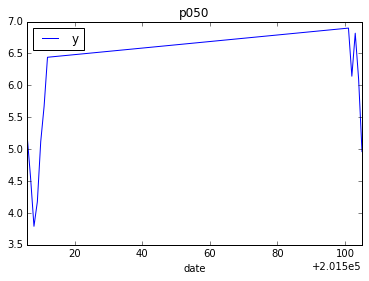

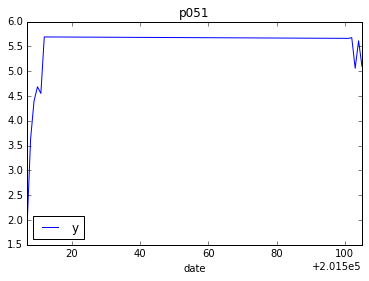

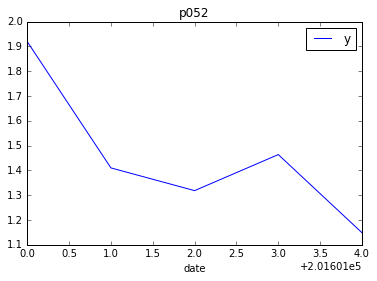

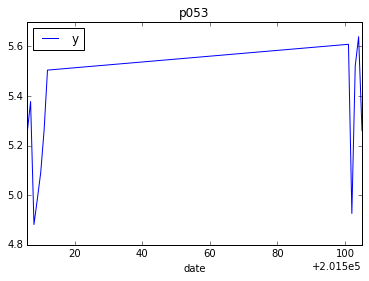

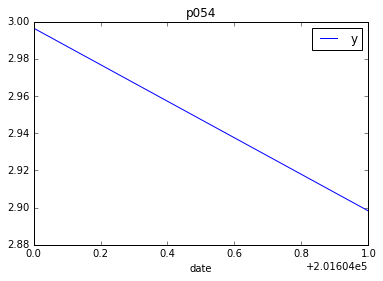

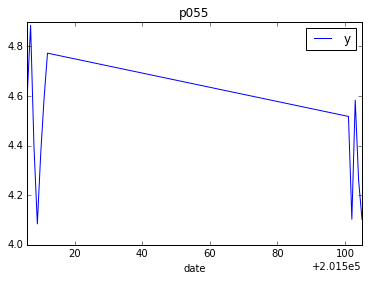

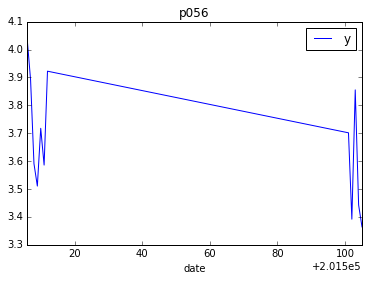

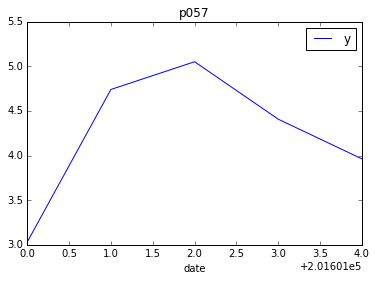

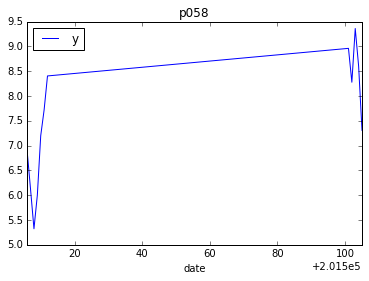

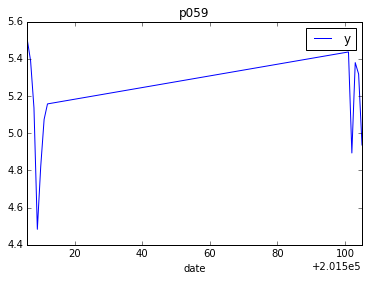

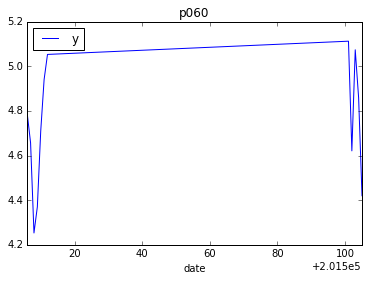

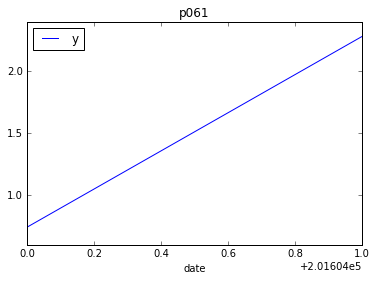

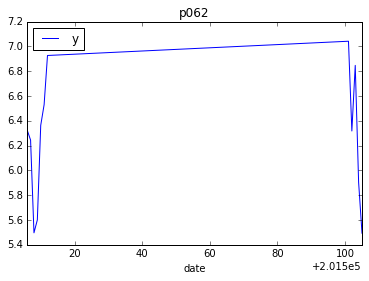

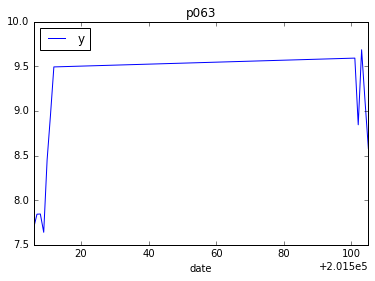

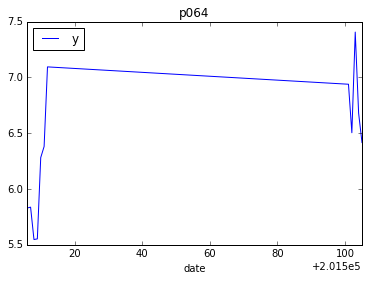

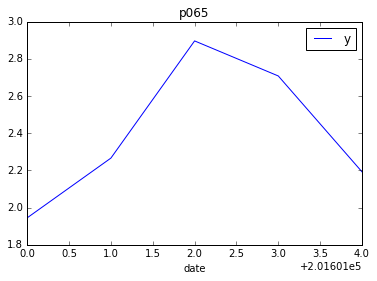

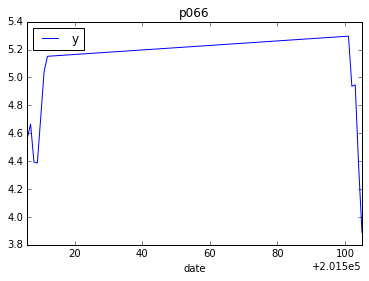

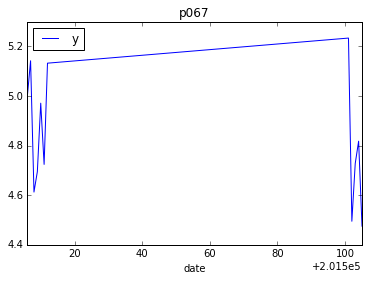

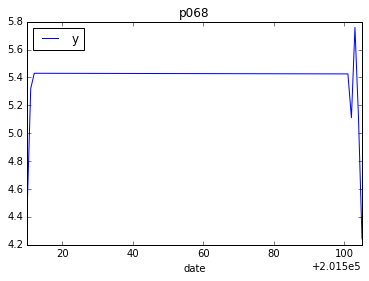

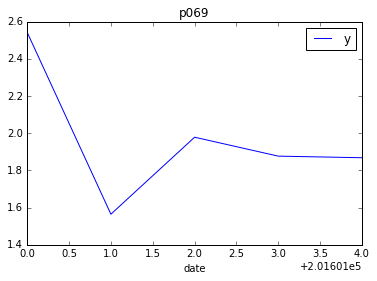

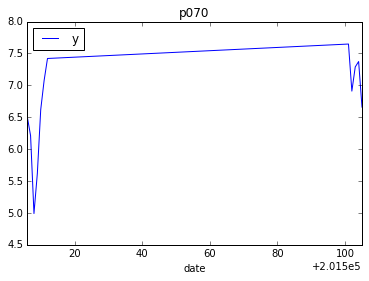

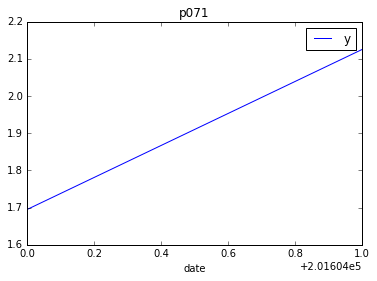

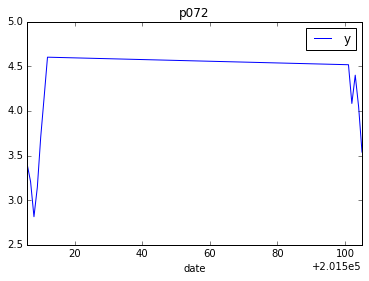

In [25]:
df_n = 'train'

for pid in pids:
    df_dict[df_n].groupby(['pid', 'date']).mean().ix[pid].plot(y='y', title=pid)

In [24]:
df_dict[df_n].groupby(['pid', 'date']).mean()

natural_lawson_store         y
pid  date                                  
p000 201506              0.088235  2.328235
     201507              0.088235  2.110356
     201508              0.088235  2.143821
     201509              0.088235  1.976485
     201510              0.088235  1.934529
     201511              0.088235  1.944553
     201512              0.088235  1.849556
     201601              0.088235  2.018259
     201602              0.088235  1.708094
     201603              0.088235  2.085859
     201604              0.088235  1.982776
     201605              0.088235  1.979894
p001 201510              0.085714  3.641183
     201511              0.085714  4.268649
     201512              0.085714  4.124220
     201601              0.085714  4.029014
     201602              0.085714  3.774391
     201603              0.088235  3.995662
     201604              0.085714  3.979491
     201605              0.085714  3.663703
p002 201506              0.090909  2.547600
     201507              0.090909  2.494688
     201508              0.090909  1.996764
     201509              0.090909  2.020915
     201510              0.090909  2.109776
     201511              0.093750  2.084000
     201512              0.090909  1.974670
     201601              0.090909  2.021015
     201602              0.090909  2.056133
     201603              0.090909  2.091848
...                           ...       ...
p069 201602              0.000000  1.564553
     201603              0.000000  1.978420
     201604              0.000000  1.876643
     201605              0.000000  1.868137
p070 201506              0.085714  6.515363
     201507              0.085714  6.210557
     201508              0.085714  4.990063
     201509              0.085714  5.619157
     201510              0.085714  6.620109
     201511              0.058824  7.075297
     201512              0.058824  7.421644
     201601              0.058824  7.648138
     201602              0.058824  6.910071
     201603              0.000000  7.288578
     201604              0.000000  7.374119
     201605              0.000000  6.658553
p071 201604              0.000000  1.695077
     201605              0.000000  2.124976
p072 201506              0.058824  3.400556
     201507              0.058824  3.206338
     201508              0.058824  2.814644
     201509              0.058824  3.146500
     201510              0.058824  3.708444
     201511              0.030303  4.149548
     201512              0.030303  4.601418
     201601              0.030303  4.516994
     201602              0.000000  4.083113
     201603              0.000000  4.399756
     201604              0.000000  4.045566
     201605              0.000000  3.538413

[689 rows x 2 columns]

In [38]:
for pid in pids:
    df_dict[df_n][(df_dict[df_n].area == '関東')&(df_dict[df_n].location == 'ビジネス立地')&(df_dict[df_n].natural_lawson_store==1)].ix[pid].plot(y='y', title=pid)

KeyError: 'p000'

In [45]:
df_dict[df_n][(df_dict[df_n].area == '関東')&(df_dict[df_n].location == 'ビジネス立地')&(df_dict[df_n].natural_lawson_store==1)].pivot(index='date',columns='pid', values='y' )

pid,p000,p001,p002,p003,p004,p005,p006,p007,p008,p009,...,p060,p062,p063,p064,p066,p067,p068,p069,p070,p072
date,,,,,,,,,,,,,,,,,,,,,
201506,3.7353,NaN,6.5055,7.0246,4.4635,6.7149,8.2152,NaN,NaN,NaN,...,4.9558,7.2176,4.5237,4.3685,5.7817,4.8772,NaN,NaN,6.0994,3.9157
201507,3.6531,NaN,6.8435,6.7324,9.2752,6.9748,7.1777,NaN,NaN,NaN,...,4.8824,6.9127,4.4052,4.9925,4.3501,5.0660,NaN,NaN,5.4387,3.8821
201508,3.5241,NaN,5.4137,5.5515,6.8502,6.4870,6.1923,NaN,NaN,NaN,...,4.1298,5.0859,4.9680,3.8846,3.4508,3.2724,NaN,NaN,3.6844,2.6798
201509,3.2409,NaN,5.4687,5.4507,7.4162,6.5443,2.0795,NaN,NaN,NaN,...,5.0659,5.9469,6.3140,4.7355,4.5152,4.2950,NaN,NaN,4.6254,4.2950
201510,3.2480,8.9854,5.9234,6.4962,7.8363,7.7633,0.9126,6.7453,NaN,NaN,...,4.9925,6.7650,5.7634,4.9558,3.9647,4.4602,2.5697,NaN,5.2862,3.9646
201511,3.1812,11.0926,5.8785,6.4232,6.8279,8.9580,4.9172,7.4497,NaN,NaN,...,5.5064,6.5196,5.0108,4.3501,6.3874,3.9206,2.6431,NaN,6.9161,5.9469
201512,2.9443,9.8489,4.9141,5.4734,7.1831,9.5020,5.5809,6.4213,NaN,NaN,...,6.7178,6.9931,6.9013,6.2406,6.8278,3.8913,3.9646,NaN,7.8742,8.5900
201601,2.6898,8.8156,4.8754,5.6441,6.8784,8.7015,6.1197,5.6220,NaN,NaN,...,4.8457,5.6716,3.8178,3.7444,2.6432,2.9736,2.2027,2.2026,4.7906,2.5331
201602,2.8634,9.6912,5.2594,6.2002,7.6612,8.9552,6.5209,5.9836,NaN,NaN,...,NaN,3.4140,3.9646,4.6254,NaN,1.1013,NaN,NaN,3.5242,NaN
